# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

us_census_list = []
csv_files = glob.glob('states[0-9].csv')
for file in csv_files:
    df = pd.read_csv(file)
    us_census_list.append(df)

us_census = pd.concat(us_census_list)
us_census.drop("Unnamed: 0", axis=1, inplace=True)
us_census.reset_index(drop=True, inplace=True)
us_census.head(10)


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
6,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [376]:
print(us_census.columns, us_census.dtypes)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object') State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [377]:
income_series = us_census.Income.str.replace(r'[$, ]', '', regex=True)
income_series_float = pd.to_numeric(income_series)
us_census.Income = income_series_float
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [378]:
gender_pop_cols = us_census.GenderPop.str.split("_", expand=True)
men_col = gender_pop_cols[0].str.strip('M')
wmn_col = gender_pop_cols[1].str.strip('F')
us_census.drop("GenderPop", axis=1, inplace=True)
us_census["Wmn_Pop"] = pd.to_numeric(wmn_col)
us_census["Men_Pop"] = pd.to_numeric(men_col)
us_census.head()


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Wmn_Pop,Men_Pop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2489527.0,2341093
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,349215.0,384160
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3342840.0,3299088
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1506295.0,1451913
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19334329.0,19087135


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

In [379]:
us_census.describe()


,TotalPop,Income,Wmn_Pop,Men_Pop
count,6.000000e+01,60.000000,5.700000e+01,6.000000e+01
mean,6.238516e+06,56632.042833,3.222093e+06,3.067189e+06
std,6.588488e+06,11470.953879,3.407467e+06,3.250785e+06
min,6.266040e+05,20720.540000,3.180310e+05,3.066740e+05
25%,2.030429e+06,49536.930000,1.051703e+06,1.006712e+06
50%,4.701414e+06,54239.860000,2.364097e+06,2.291782e+06
75%,7.303256e+06,64341.505000,4.195682e+06,3.631031e+06
max,3.842146e+07,78765.400000,1.933433e+07,1.908714e+07


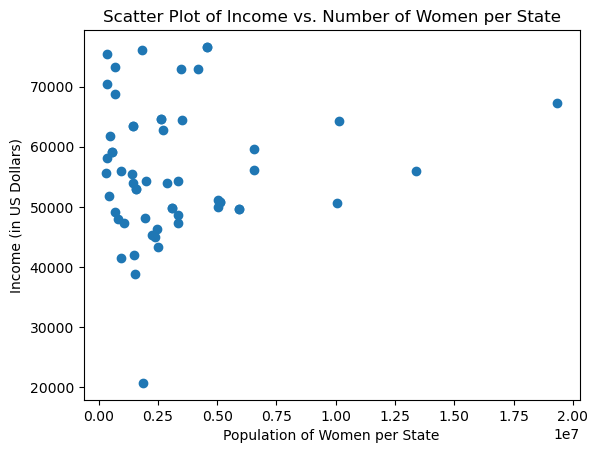

<Figure size 640x480 with 0 Axes>

In [380]:
plt.scatter(us_census["Wmn_Pop"], us_census["Income"])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [381]:
#we also check to see if there were any errors in collecting the data
wmn_verif = us_census["TotalPop"] - us_census["Men_Pop"]

for i in range(len(wmn_verif)):
    if wmn_verif[i] != us_census["Wmn_Pop"].iloc[i]:
        print(f"{i}, {wmn_verif[i]}, {us_census.Wmn_Pop.iloc[i]}")
        
us_census.Wmn_Pop.fillna(wmn_verif, inplace=True)

23, 3057895, nan
24, 3057895, nan
31, 504536, nan


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [382]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

11. Drop those duplicates using the `.drop_duplicates()` function.

In [383]:
us_census.drop_duplicates(inplace=True)
us_census.reset_index(drop=True, inplace=True)
us_census


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Wmn_Pop,Men_Pop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2489527.0,2341093
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,349215.0,384160
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3342840.0,3299088
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1506295.0,1451913
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19334329.0,19087135
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2630239.0,2648667
6,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1841615.0,1751607
7,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,478041.0,448413
8,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,340810.0,306674
9,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,10045763.0,9600009


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

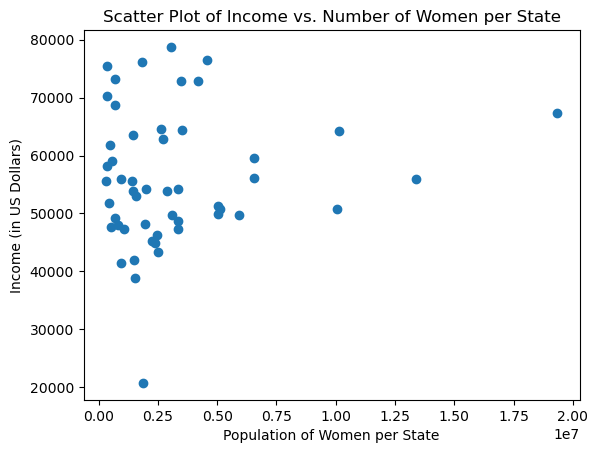

<Figure size 640x480 with 0 Axes>

In [384]:
plt.scatter(us_census["Wmn_Pop"], us_census["Income"])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [385]:
race_cols = us_census.columns[2:-3]
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Wmn_Pop,Men_Pop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2489527.0,2341093
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,349215.0,384160
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3342840.0,3299088
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1506295.0,1451913
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19334329.0,19087135


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [386]:
for race in race_cols:
    us_census[f'{race}'] = us_census[f'{race}'].str.strip('%') 
    us_census[f'{race}'] = pd.to_numeric(us_census[f'{race}'])

us_census.head(12)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Wmn_Pop,Men_Pop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2489527.0,2341093
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,349215.0,384160
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3342840.0,3299088
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1506295.0,1451913
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19334329.0,19087135
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2630239.0,2648667
6,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1841615.0,1751607
7,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,478041.0,448413
8,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,340810.0,306674
9,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,10045763.0,9600009


In [387]:
us_census.Pacific
pacific_verif = 100.0 - us_census[race_cols[:-1]].apply(lambda row: sum(row.values), axis=1) # we got the pacific verifier

for i in range(len(pacific_verif)):
    if pacific_verif[i] != us_census["Pacific"].iloc[i]:
        print(f"{i}, {pacific_verif[i]}, {us_census.Pacific.iloc[i]}")

# we can observe there was an error in the collection of data which is probably due to the missing field "OTHER" this 
# might slightly influence our fillna method as the difference between the calculated numbers and the given ones is 
# usually one or two percent points away, This issue is especially evident in the row at index 11 of the data frame
# two better alternatives would be to either remove the rows or fill the missing values with the mean from the df
# a.i. the national proportion for said people-group
us_census.Pacific.fillna(pacific_verif, inplace=True)
us_census.Pacific

0, 1.6200000000000045, 0.03
1, 8.490000000000009, 1.06
2, 2.220000000000013, 0.17
3, 2.010000000000005, 0.15
4, 3.3500000000000085, 0.35
5, 2.5400000000000063, nan
6, 2.220000000000013, 0.02
7, 2.2800000000000153, nan
8, 2.3699999999999903, 0.03
9, 1.9200000000000017, 0.05
10, 1.9099999999999966, 0.05
11, 27.0, 8.76
12, 2.1700000000000017, 0.13
13, 1.8299999999999983, 0.02
14, 2.069999999999993, 0.03
15, 1.7299999999999898, 0.06
16, 2.7700000000000102, nan
17, 1.980000000000004, 0.05
18, 1.6700000000000017, 0.04
19, 1.9699999999999989, 0.02
20, 2.6400000000000006, 0.04
21, 2.700000000000003, 0.02
22, 2.460000000000008, 0.02
23, 2.530000000000001, 0.03
24, 1.1099999999999994, 0.02
25, 2.34999999999998, 0.1
26, 2.25, 0.07
27, 1.980000000000004, 0.06
28, 3.730000000000004, 0.57
29, 1.8000000000000114, 0.02
30, 2.089999999999989, 0.03
31, 1.779999999999987, 0.04
32, 2.4000000000000057, 0.02
33, 2.1299999999999955, 0.05
34, 1.8299999999999983, nan
35, 2.4299999999999926, 0.02
36, 7.03000000

0     0.03
1     1.06
2     0.17
3     0.15
4     0.35
5     2.54
6     0.02
7     2.28
8     0.03
9     0.05
10    0.05
11    8.76
12    0.13
13    0.02
14    0.03
15    0.06
16    2.77
17    0.05
18    0.04
19    0.02
20    0.04
21    0.02
22    0.02
23    0.03
24    0.02
25    0.10
26    0.07
27    0.06
28    0.57
29    0.02
30    0.03
31    0.04
32    0.02
33    0.05
34    1.83
35    0.02
36    0.11
37    0.35
38    0.02
39    0.00
40    0.04
41    0.05
42    0.04
43    0.04
44    0.07
45    0.83
46    0.03
47    0.06
48    0.61
49    0.03
50    0.02
Name: Pacific, dtype: float64

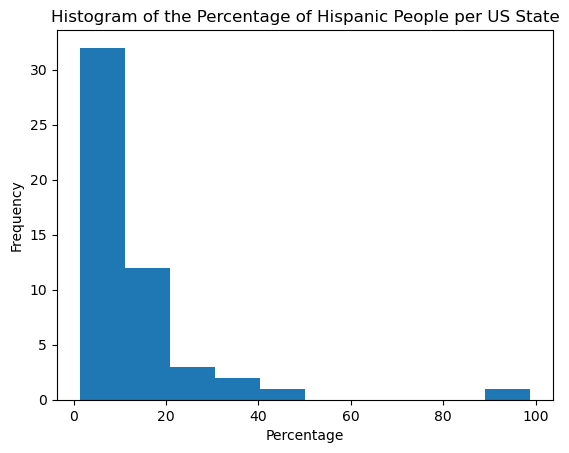

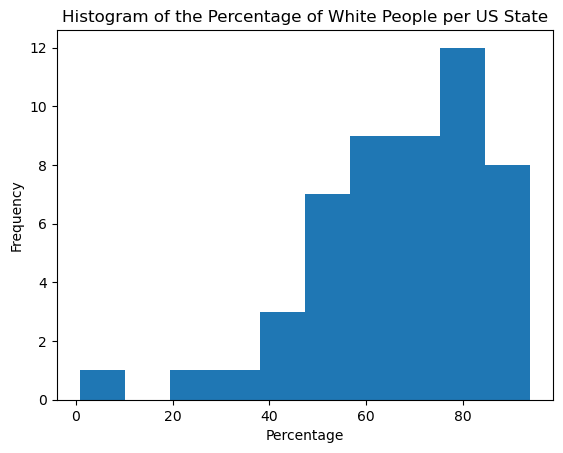

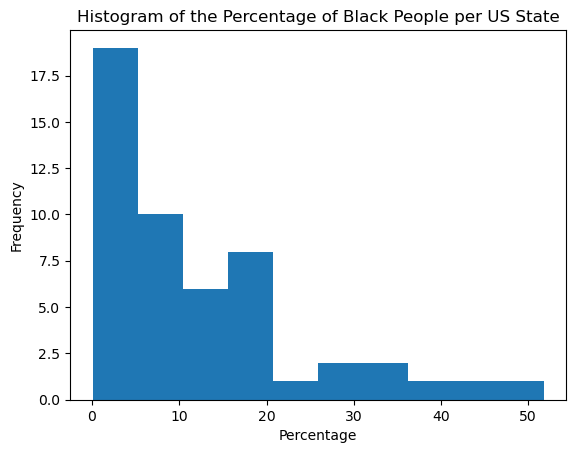

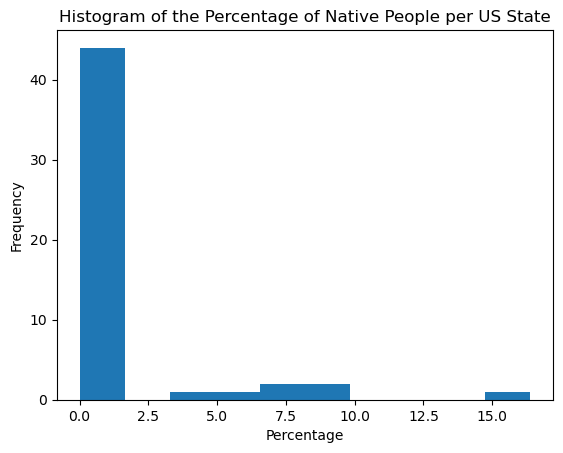

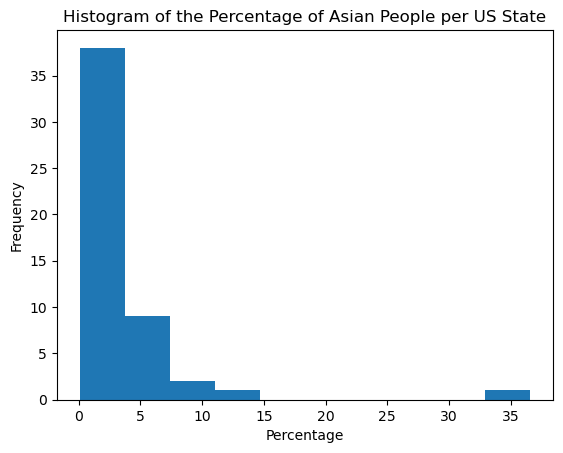

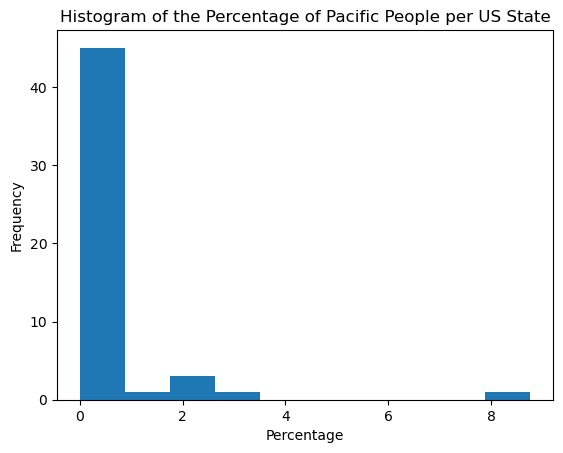

<Figure size 640x480 with 0 Axes>

In [392]:
import os

# Create the 'plots' folder if it doesn't exist
if not os.path.exists('Histograms'):
    os.makedirs('Histograms')

for race in race_cols:
    plt.hist(us_census[f'{race}'])
    plt.title(f"Histogram of the Percentage of {race} People per US State")
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    hist_name = f"Histograms/Histogram of the Percentage of {race} People per US State.jpeg"
    if not os.path.isfile(f"Histograms/Histogram of the Percentage of {race} People per US State.jpeg"):
        plt.savefig(f"Histograms/Histogram of the Percentage of {race} People per US State.jpeg")
    plt.show()
    plt.clf()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.